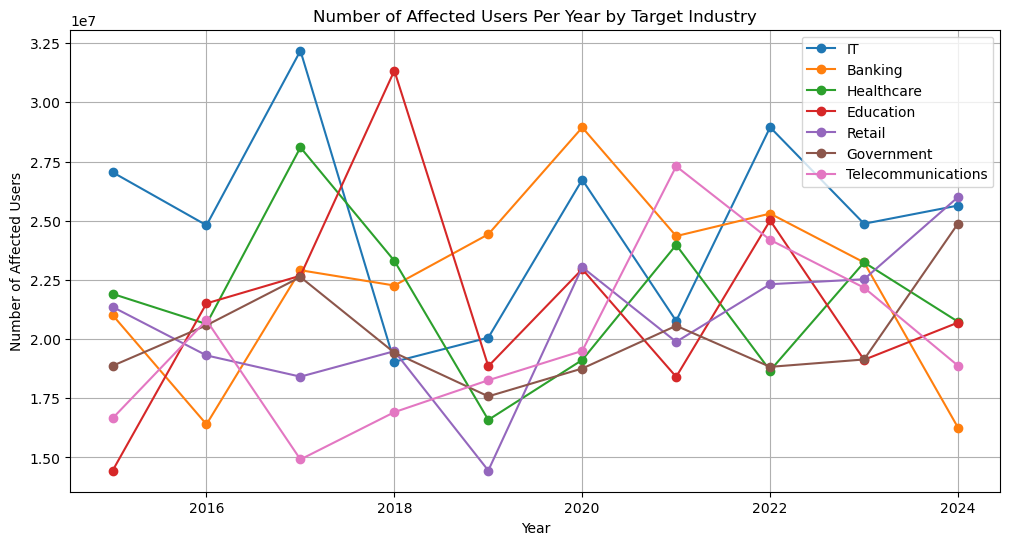

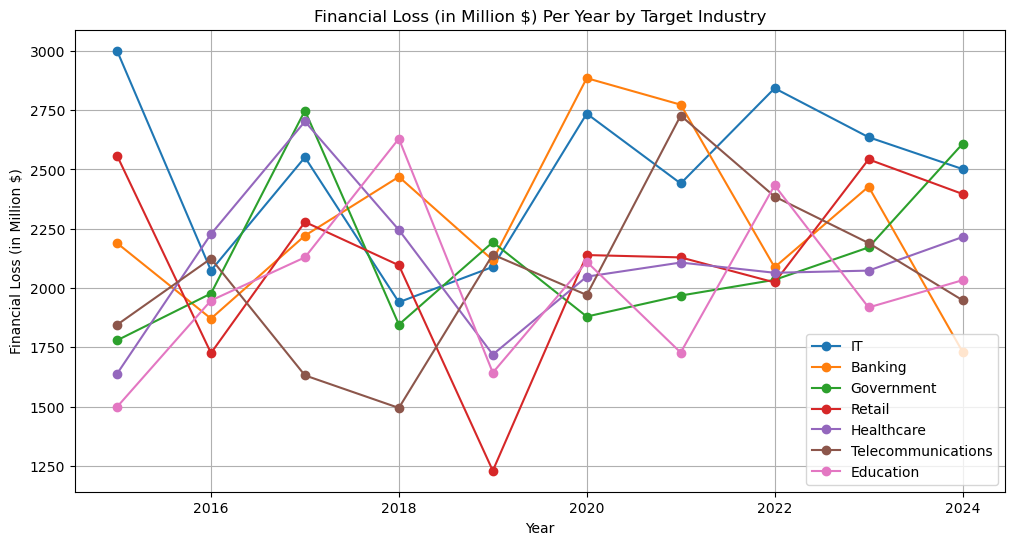

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Exploratory Data Analysis (EDA) - Total Affected Users and Financial Loss (in Million $) By Target Industry per Year
# Dataset
data = pd.read_csv("Global_Cybersecurity_Threats_2015-2024.csv")

target_col = ["Number of Affected Users", "Financial Loss (in Million $)"]
for dt in target_col:
    # Group by 'Target Industry' and sum values
    stats = data.groupby("Target Industry")[[dt]].sum()
    stats = stats.sort_values(by=dt, ascending=False)
    
    # Get unique years
    years = sorted(data["Year"].unique())
    stats_year = pd.DataFrame(index=stats.index, columns=years)

    # Add total per year for each year
    for year in years:
        yearly_data = data[data["Year"] == year].groupby("Target Industry")[[dt]].sum()
        stats_year[year] = yearly_data[dt]

    stats_year = stats_year.fillna(0) 
    
    # Plot
    plt.figure(figsize=(12, 6))
    for industry in stats_year.index:  # Plot only top 5 industries
        plt.plot(years, stats_year.loc[industry, years], marker="o", label=industry)
    
    # Line Chart
    plt.xlabel("Year")
    plt.ylabel(dt)
    plt.title(f"{dt} Per Year by Target Industry")
    plt.legend()
    plt.grid(True)
    plt.show()

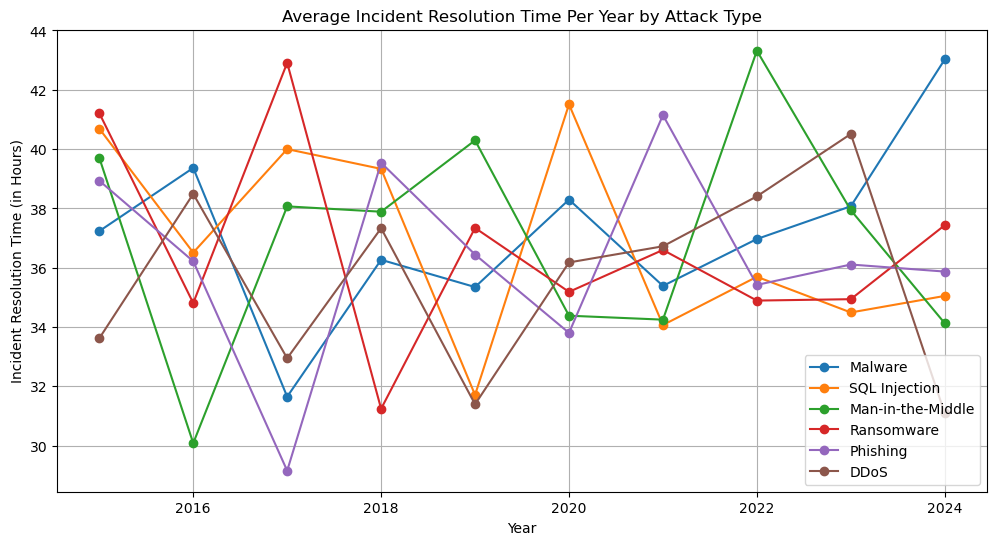

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Exploratory Data Analysis (EDA) - Average Resolution Time By Attack Type
# Dataset
data = pd.read_csv("Global_Cybersecurity_Threats_2015-2024.csv")

# Group by 'Attack Type' and avg values
stats = data.groupby("Attack Type")[['Incident Resolution Time (in Hours)']].mean()
stats = stats.sort_values(by='Incident Resolution Time (in Hours)', ascending=False)

# Get unique years
years = sorted(data["Year"].unique())
stats_year = pd.DataFrame(index=stats.index, columns=years)

# Add total per year for each year
for year in years:
    yearly_data = data[data["Year"] == year].groupby("Attack Type")[['Incident Resolution Time (in Hours)']].mean()
    stats_year[year] = yearly_data['Incident Resolution Time (in Hours)']

stats_year = stats_year.fillna(0) 

# Plot
plt.figure(figsize=(12, 6))
for attack in stats_year.index:  # Plot only top 5 industries
    plt.plot(years, stats_year.loc[attack, years], marker="o", label=attack)

# Line Chart
plt.xlabel("Year")
plt.ylabel('Incident Resolution Time (in Hours)')
plt.title("Average Incident Resolution Time Per Year by Attack Type")
plt.legend()
plt.grid(True)
plt.show()